In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append('..')
from util import *
from data import read_games

In [2]:
# Data
import os
data_directory = os.getcwd() + '/../../bin/'
# print(data_directory)
games_data = read_games(data_directory)

games_count_by_genre_and_year = games_data.groupby(['Genre', 'Release Year']).size().reset_index(name="Count")
print(games_count_by_genre_and_year)

## Below is the manual transformation of an existing pandas dataframe to a dictionary of multiple arrays, which is extremely tedious.
## And applying these arrays to plt is also very nasty.

### Are there any simple approach that achieve same result?
### That should answer 2 questions:
### 1. Is there a simple way to do the transformation in pandas?
### 2. Is there a way for plt to plot the dataframe rather than the arrays?

years = games_count_by_genre_and_year['Release Year'].unique()
genres = games_count_by_genre_and_year['Genre'].unique()

sample = []
count_by_genres_along_years = {}
for genre in genres:
    count_by_genres_along_years[genre] = {}
    count_along_years = []
    for year in years:
        val = games_count_by_genre_and_year[(games_count_by_genre_and_year['Genre'] == genre) & (games_count_by_genre_and_year['Release Year'] == year)]['Count']
        if (len(val) == 0):
            count_along_years.append(0)
        else:
            count_along_years.append(val.tolist()[0])
    count_by_genres_along_years[genre] = count_along_years
    sample = count_along_years

count_by_genres_along_years_table = pd.DataFrame(count_by_genres_along_years)
print(count_by_genres_along_years_table)

        Genre  Release Year  Count
0      Action          2000     16
1      Action          2001     13
2      Action          2002     15
3      Action          2003     15
4      Action          2004     16
..        ...           ...    ...
331  Survival          2019     14
332  Survival          2020     11
333  Survival          2021     10
334  Survival          2022      9
335  Survival          2023     12

[336 rows x 3 columns]
    Action  Adventure  Fighting  Horror  Platformer  Puzzle  Racing  \
0       16         19        16      12          11      17      11   
1       13         16        14      18          11      18      15   
2       15         16        16      16          16      17      17   
3       15         11        13      16          19      19      14   
4       16         14         9      14          13      14      18   
5       15         15        19      16          12      13      13   
6       13         13        13      12          16      28

dict_keys(['Action', 'Adventure', 'Fighting', 'Horror', 'Platformer', 'Puzzle', 'Racing', 'Role-playing', 'Shooter', 'Simulation', 'Sports', 'Stealth', 'Strategy', 'Survival'])


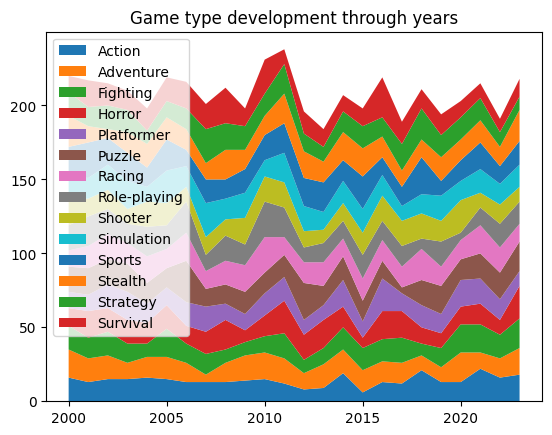

In [3]:
print(count_by_genres_along_years.keys())

plt.title('Game type development through years')
plt.stackplot(years, count_by_genres_along_years.values(), labels = count_by_genres_along_years.keys())
plt.legend(loc = 'upper left')
plt.show()